In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

df = pd.read_csv('climate_change_impact_on_agriculture_2024.csv')

df = df.loc[(df['Country'] == 'USA') ]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1032 entries, 5 to 9983
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1032 non-null   int64  
 1   Country                      1032 non-null   object 
 2   Region                       1032 non-null   object 
 3   Crop_Type                    1032 non-null   object 
 4   Average_Temperature_C        1032 non-null   float64
 5   Total_Precipitation_mm       1032 non-null   float64
 6   CO2_Emissions_MT             1032 non-null   float64
 7   Crop_Yield_MT_per_HA         1032 non-null   float64
 8   Extreme_Weather_Events       1032 non-null   int64  
 9   Irrigation_Access_%          1032 non-null   float64
 10  Pesticide_Use_KG_per_HA      1032 non-null   float64
 11  Fertilizer_Use_KG_per_HA     1032 non-null   float64
 12  Soil_Health_Index            1032 non-null   float64
 13  Adaptation_Strategies  

In [2]:
df = df.drop(columns=['Country', 'Crop_Type',
                       'Adaptation_Strategies', 'Soil_Health_Index', 'Fertilizer_Use_KG_per_HA', 'Pesticide_Use_KG_per_HA'])
df.describe(exclude=np.number)

,Region
count,1032
unique,4
top,South
freq,263


In [3]:
# Dividir en 3 categorías basadas en cuantiles
df['Economic_Impact_Category'] = pd.qcut(df['Economic_Impact_Million_USD'], q=3, labels=['Bajo', 'Medio', 'Alto'])

# Verificar los cambios
print(df[['Economic_Impact_Million_USD', 'Economic_Impact_Category']].head())

    Economic_Impact_Million_USD Economic_Impact_Category
5                        353.16                     Bajo
13                      1126.27                     Alto
25                      1492.19                     Alto
45                       925.79                     Alto
60                       509.77                    Medio


In [4]:
# Identificar columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

le_region = LabelEncoder()

# Aplicar Label Encoding
for col in categorical_columns:
    df[col] = le_region.fit_transform(df[col])

df

,Year,Region,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Economic_Impact_Million_USD,Economic_Impact_Category
5,2019,0,17.19,975.13,10.73,2.180,5,52.45,353.16,Bajo
13,2003,1,14.70,2272.28,11.45,2.500,9,57.37,1126.27,Alto
25,1996,2,27.73,1673.81,26.56,3.285,1,88.61,1492.19,Alto
45,2024,2,12.18,1647.58,19.10,1.872,8,36.61,925.79,Alto
60,2023,1,30.62,1630.22,29.28,3.249,9,70.31,509.77,Medio
...,...,...,...,...,...,...,...,...,...,...
9929,2013,1,12.75,2567.57,3.21,2.300,5,71.78,1100.84,Alto
9947,2002,3,5.87,952.47,13.88,2.560,2,93.01,774.78,Medio
9964,2021,3,14.81,747.56,13.22,3.620,6,36.12,1744.66,Alto
9982,2016,1,24.58,1067.86,15.60,2.709,8,53.82,1291.31,Alto


v:\Ciencia de Datos\Predicciones_exposicion\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:36:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Reporte de clasificación:
              precision    recall  f1-score   support

        Alto       1.00      1.00      1.00       105
        Bajo       1.00      1.00      1.00       102
       Medio       1.00      1.00      1.00       103

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



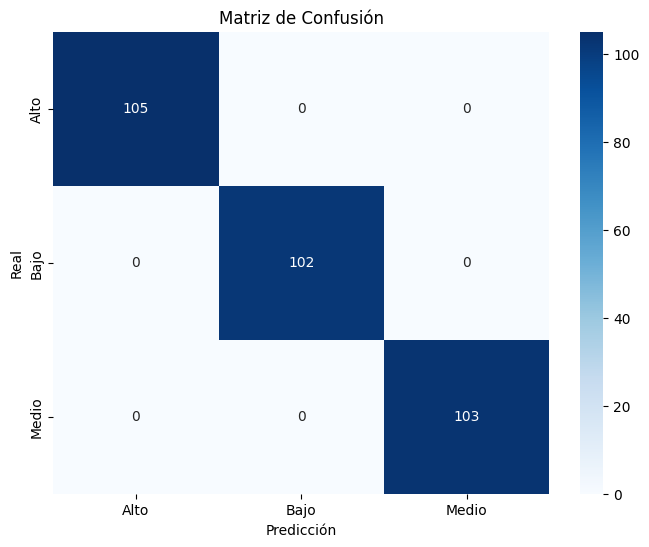

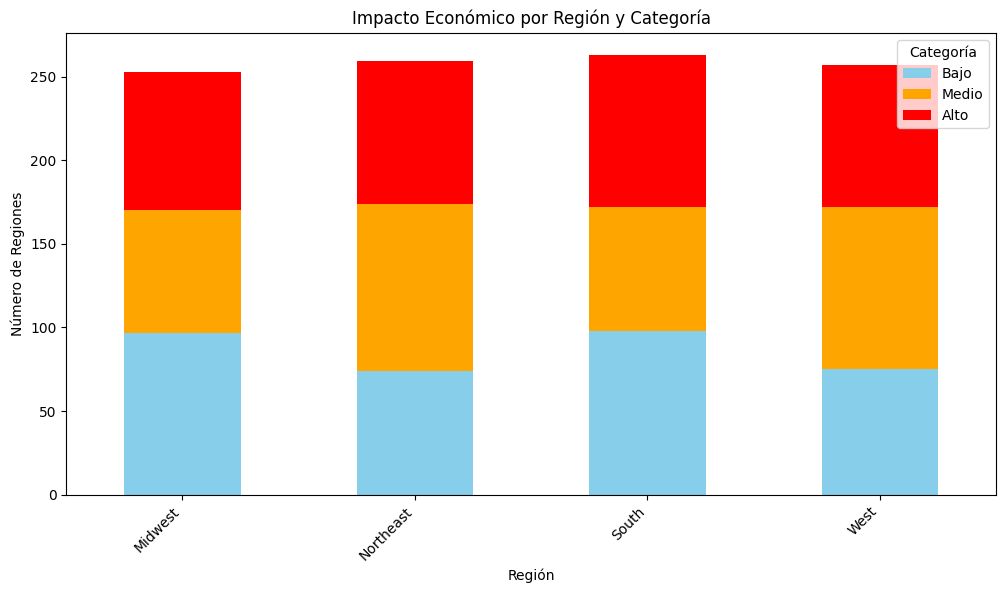

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Separar características (X) y la variable objetivo (y)
X = df.drop(columns=['Economic_Impact_Category'])
y = df['Economic_Impact_Category']

# Codificar las clases de la variable objetivo
le = LabelEncoder()
y = le.fit_transform(y)  # Convierte 'Alto', 'Bajo', 'Medio' a 0, 1, 2

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, enable_categorical=True)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))  # Mostrar etiquetas originales

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un heatmap con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

df['Predicted_Category'] = le.inverse_transform(model.predict(X))
df['Region'] = le_region.inverse_transform(df['Region'])
# Agrupar por región y categoría predicha
region_impact = df.groupby(['Region', 'Predicted_Category']).size().unstack()

# Reordenar las columnas en el orden deseado
region_impact = region_impact[['Bajo', 'Medio', 'Alto']]

# Crear el gráfico de barras con nombres de regiones
region_impact.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'orange', 'red'])
plt.title('Impacto Económico por Región y Categoría')
plt.xlabel('Región')
plt.ylabel('Número de Regiones')
plt.xticks(rotation=45, ha='right')  # Rotar los nombres de las regiones para mejor legibilidad
plt.legend(title='Categoría', loc='upper right')
plt.show()

C:\Users\cifu1\AppData\Local\Temp\ipykernel_2448\722712224.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Economic_Impact_Million_USD', data=df_west, marker='o', color='blue', ci=None)


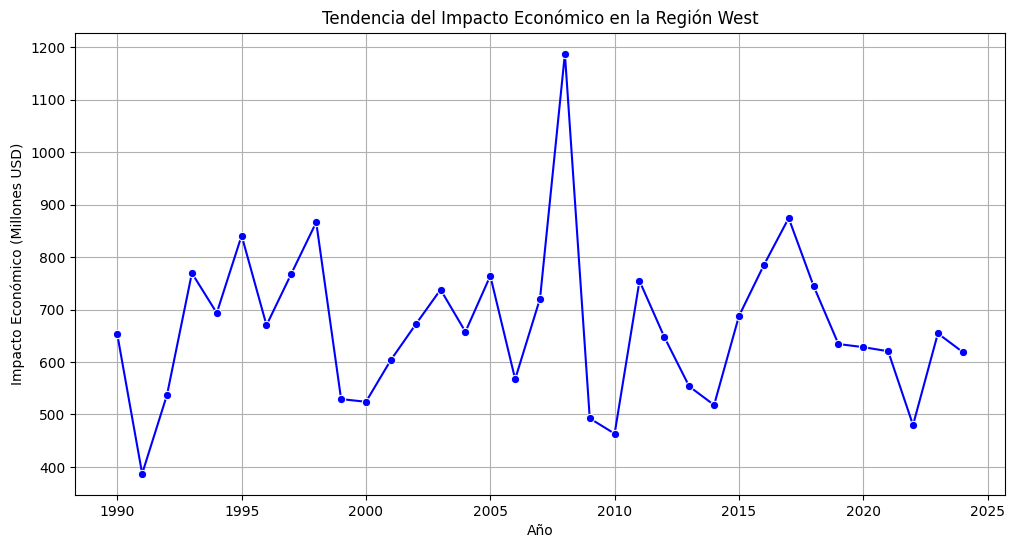

In [6]:
# Filtrar solo la región "West"
df_west = df[df['Region'] == 'West']

# Crear el gráfico de líneas solo para la región "West"
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Economic_Impact_Million_USD', data=df_west, marker='o', color='blue', ci=None)

# Configurar el título y etiquetas
plt.title('Tendencia del Impacto Económico en la Región West')
plt.xlabel('Año')
plt.ylabel('Impacto Económico (Millones USD)')
plt.grid(True)  # Opcional: agregar una cuadrícula para mejor visualización
plt.show()